In [17]:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [18]:
from keras import regularizers
import os

In [19]:

mylist= os.listdir('RawData/')

In [20]:

print(len(mylist))

1920


In [21]:

print(mylist[1800])

sa01 (2).wav


In [22]:

print(mylist[400][6:-16])

03


In [23]:

data, sampling_rate = librosa.load('RawData/f11 (2).wav')

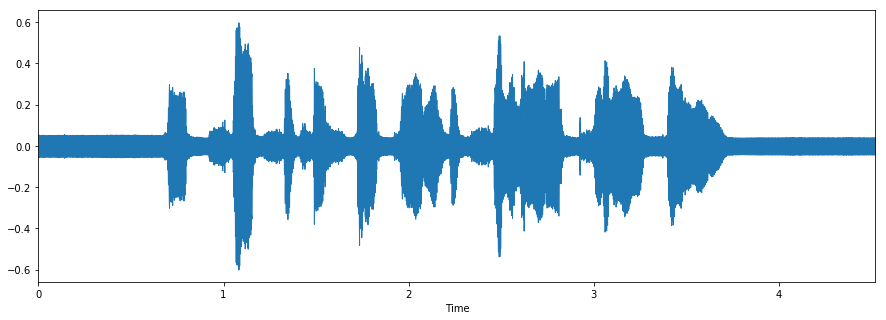

In [24]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

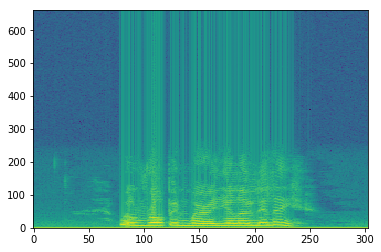

In [25]:

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('RawData/f10 (2).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [26]:

feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [27]:
labels = pd.DataFrame(feeling_list)

In [28]:

labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [29]:
from librosa import *

In [30]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [31]:
df[:5]

,feature
0,"[-70.2677641610773, -70.2677641610773, -70.267..."
1,"[-65.70765240065282, -65.70765240065282, -63.1..."
2,"[-65.4824988827423, -65.4824988827423, -65.482..."
3,"[-64.52844910346735, -64.52844910346735, -64.5..."
4,"[-62.36431052745468, -59.93472513811134, -61.8..."


In [32]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [33]:

newdf = pd.concat([df3,labels], axis=1)

In [34]:

rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [35]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,...,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,...,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,...,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,...,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,...,-39.071328,-41.897121,-40.865430,-38.290605,-36.372397,-37.915779,-40.026125,-43.383777,-43.965398,male_calm


In [36]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1009,-7.254249,-7.798417,-5.338212,-6.338066,-12.430396,-14.711071,-11.872595,-12.552716,-15.516611,-17.242078,...,-2.437635,-1.668561,-1.415058,-0.254544,0.359659,-0.788785,0.450203,2.105713,4.715723,male_angry
1057,-3.501438,-6.034619,-13.409296,-14.952498,-16.326827,-16.640321,-17.993235,-17.409385,-16.666675,-16.172272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fearful
772,-62.398449,-60.504985,-56.733540,-56.245006,-58.034212,-60.989969,-60.551022,-60.285434,-61.149769,-60.055145,...,-56.053751,-58.752717,-58.840512,-56.561908,-56.074789,-57.301597,-60.498674,-56.931386,-55.152539,male_fearful
524,-53.420048,-52.269162,-51.867553,-52.629332,-52.948955,-50.759222,-49.851275,-47.995234,-47.259735,-45.569509,...,-22.975843,-23.140542,-22.822230,-23.393989,-25.229245,-26.039860,-25.497577,-20.175978,-15.432287,male_sad
976,-25.082708,-25.211529,-10.960526,-2.494657,-0.711743,-0.107495,1.349230,2.382443,2.559838,-1.681059,...,-25.222925,-22.785147,-23.360131,-22.886477,-21.424888,-22.595119,-23.384199,-23.606464,-25.523274,male_angry
123,-62.435233,-60.987809,-60.403913,-60.022330,-59.200268,-59.942170,-59.997592,-58.442884,-58.532731,-60.239300,...,-52.922695,-51.896186,-54.785357,-56.142794,-53.869643,-54.963020,-55.977473,-57.662542,-56.375559,female_calm
549,-47.414285,-48.179826,-51.837040,-51.647989,-54.661437,-58.216289,-58.381826,-57.828549,-57.804660,-57.082074,...,-49.914323,-51.756486,-52.832853,-56.316714,-56.228034,-56.760224,-56.698584,-55.908250,-55.275066,female_sad
134,-48.804819,-52.412845,-54.739909,-50.976137,-51.428154,-51.092459,-49.567096,-49.011941,-48.885962,-49.207573,...,-40.730366,-39.789640,-39.102859,-40.432633,-41.893508,-42.905252,-40.767274,-41.936145,-43.540240,male_calm
741,-47.356522,-47.379230,-47.379230,-47.395435,-47.436260,-47.356291,-47.264125,-47.361676,-47.499221,-47.417566,...,-31.666106,-32.830323,-33.882842,-33.577562,-32.613459,-31.279630,-30.565347,-19.475847,-12.500349,female_angry
845,-57.887531,-58.729478,-60.239538,-59.231814,-60.533457,-62.250646,-62.146727,-62.207708,-63.436214,-63.366909,...,-59.595090,-61.578362,-59.248593,-57.451714,-56.778905,-55.437397,-56.004119,-57.401523,-53.128893,female_fearful


In [37]:
rnewdf=rnewdf.fillna(0)

In [38]:

newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [39]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
169,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,-65.190149,...,-31.973387,-31.609778,-30.257252,-30.320113,-29.577862,-29.647746,-29.809923,-28.651847,-26.188556,female_calm
292,-59.709553,-60.011674,-59.803761,-56.803096,-55.476826,-56.623761,-58.857121,-60.852016,-59.201946,-56.501222,...,-35.847700,-35.395162,-37.004206,-38.270817,-38.170345,-40.558376,-41.668358,-28.840480,-22.668736,male_happy
283,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,...,-63.968357,-62.205670,-63.053774,-63.764809,-62.634020,-63.911225,-64.807913,-62.783637,-63.491862,female_happy
128,-45.739615,-40.491761,-37.945276,-36.681511,-35.135588,-34.828884,-36.005736,-36.209401,-35.726750,-36.520796,...,-60.030684,-58.279354,-57.488321,-57.152054,-60.502762,-67.557878,-61.624913,-58.158140,-54.761308,male_calm
35,-51.269050,-50.878669,-50.153803,-50.264603,-49.667231,-50.569767,-53.410172,-55.976023,-56.247380,-56.110474,...,-49.215055,-50.552686,-52.031738,-52.647219,-53.915455,-53.267065,-56.158326,-57.618284,-55.896618,female_calm
296,-44.885854,-45.082421,-47.076502,-46.610296,-46.318369,-47.088493,-48.267672,-47.895986,-48.130202,-48.102341,...,-33.019653,-35.128218,-38.451996,-36.806465,-37.327523,-38.855880,-40.543094,-40.002530,-41.686634,male_happy
1108,-26.402715,-25.203680,-24.126587,-25.761993,-25.668251,-24.523483,-24.394579,-23.242567,-23.247674,-24.421673,...,-26.989069,-26.051466,-26.394041,-27.069594,-23.987355,-24.347926,-27.144016,-25.208550,-24.102236,male_happy
795,-56.482263,-56.482263,-56.482263,-56.499990,-56.485920,-56.520279,-56.482263,-56.482263,-56.482263,-56.482263,...,-56.482263,-56.482263,-56.478873,-56.474925,-56.482263,-56.482263,-56.485462,-56.541448,-56.482263,female_fearful
1123,-5.412480,-6.760820,-9.714999,-10.901871,-10.930172,-11.509631,-11.383667,-11.377581,-10.658084,-7.542358,...,-12.720633,-12.530707,-11.047561,-10.174130,-8.591425,-8.287187,-8.286090,-10.920871,-11.975824,male_happy
63,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,...,-48.047974,-47.247027,-48.581342,-49.657013,-51.463253,-51.951028,-50.134878,-50.420952,-51.600731,female_calm


In [40]:
trainfeatures = train.iloc[:, :-1]

In [41]:
trainlabel = train.iloc[:, -1:]

In [42]:

testfeatures = test.iloc[:, :-1]

In [43]:

testlabel = test.iloc[:, -1:]

In [44]:

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

c:\users\subhrajit\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:

X_train.shape

(944, 216)

In [47]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [48]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [49]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [50]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [51]:

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=7, validation_data=(x_testcnn, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 944 samples, validate on 256 samples
Epoch 1/7
944/944 [==============================] - 16s 16ms/step - loss: 2.3730 - acc: 0.1155 - val_loss: 2.2694 - val_acc: 0.1602
Epoch 2/7
944/944 [==============================] - 5s 5ms/step - loss: 2.2926 - acc: 0.1356 - val_loss: 2.2563 - val_acc: 0.1523
Epoch 3/7
944/944 [==============================] - 5s 5ms/step - loss: 2.2576 - acc: 0.1547 - val_loss: 2.2361 - val_acc: 0.1562
Epoch 4/7
944/944 [==============================] - 4s 5ms/step - loss: 2.2304 - acc: 0.1674 - val_loss: 2.2107 - val_acc: 0.1992
Epoch 5/7
944/944 [==============================] - 5s 6ms/step - loss: 2.2077 - acc: 0.2023 - val_loss: 2.2118 - val_acc: 0.1719
Epoch 6/7
944/944 [==============================] - 6s 7ms/step - loss: 2.1868 - acc: 0.1981 - val_loss: 2.1938 - val_acc: 0.2031
Epoch 7/7
944/944 [==============================] - 6s 6ms/step - loss: 2.1611 - acc: 0.2193 - val_loss: 2.1693 - val

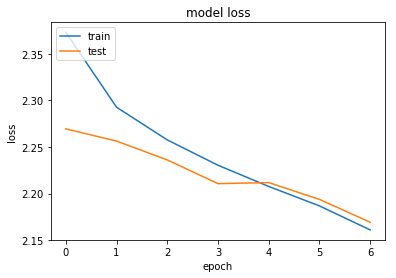

In [52]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Subhrajit\AppData\Local\Programs\Python\Python36\Scripts\saved_models\Emotion_Voice_Detection_Model.h5 


In [54]:

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [55]:

# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 23.05%


In [56]:

preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

256/256 [==============================] - 0s 1ms/step


In [57]:

preds

array([[0.08178785, 0.08944188, 0.13101706, ..., 0.07263462, 0.11013606,
        0.10178679],
       [0.06159572, 0.09336277, 0.0739691 , ..., 0.14526278, 0.1275788 ,
        0.16268486],
       [0.10135733, 0.05384891, 0.09752041, ..., 0.09226949, 0.14975554,
        0.10713658],
       ...,
       [0.06203015, 0.11851908, 0.10211362, ..., 0.08938909, 0.09353371,
        0.13257733],
       [0.0711915 , 0.08213896, 0.07446693, ..., 0.13621204, 0.10758898,
        0.14693089],
       [0.06816243, 0.12231223, 0.13237847, ..., 0.13350715, 0.09272946,
        0.08346006]], dtype=float32)

In [58]:
preds1=preds.argmax(axis=1)

In [59]:
preds1

array([2, 9, 5, 7, 7, 1, 9, 2, 9, 4, 4, 9, 9, 9, 9, 5, 4, 4, 3, 7, 4, 4,
       4, 4, 9, 9, 8, 5, 4, 9, 9, 5, 7, 9, 4, 9, 4, 7, 5, 9, 6, 4, 9, 8,
       4, 9, 7, 8, 4, 7, 9, 9, 8, 4, 8, 4, 9, 9, 7, 5, 7, 5, 4, 4, 8, 4,
       9, 7, 8, 8, 4, 9, 9, 7, 8, 9, 9, 9, 4, 4, 9, 4, 4, 7, 9, 4, 9, 4,
       5, 4, 4, 9, 4, 7, 4, 4, 4, 9, 3, 9, 4, 4, 4, 4, 4, 4, 4, 4, 8, 9,
       8, 4, 9, 4, 8, 2, 9, 7, 9, 8, 4, 4, 3, 4, 9, 4, 4, 9, 2, 8, 9, 5,
       2, 9, 1, 4, 8, 9, 9, 9, 4, 2, 9, 4, 7, 4, 9, 9, 9, 5, 7, 9, 4, 9,
       8, 4, 7, 3, 3, 4, 7, 9, 9, 9, 9, 9, 9, 4, 9, 4, 9, 5, 9, 8, 8, 4,
       4, 4, 9, 9, 4, 8, 9, 4, 4, 2, 4, 9, 9, 4, 9, 4, 4, 7, 4, 8, 9, 4,
       9, 4, 4, 9, 5, 9, 7, 5, 4, 7, 9, 9, 9, 9, 4, 4, 7, 9, 9, 9, 4, 7,
       8, 4, 8, 4, 9, 4, 4, 4, 9, 8, 9, 7, 4, 9, 4, 5, 8, 4, 3, 4, 9, 9,
       9, 9, 1, 2, 4, 9, 8, 9, 8, 9, 9, 4, 9, 4], dtype=int64)

In [60]:
abc = preds1.astype(int).flatten()

In [61]:
predictions = (lb.inverse_transform((abc)))

In [62]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_fearful
1,male_sad
2,male_angry
3,male_fearful
4,male_fearful
5,female_calm
6,male_sad
7,female_fearful
8,male_sad
9,female_sad


In [63]:

actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [64]:

actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_fearful
1,male_angry
2,male_fearful
3,male_happy
4,male_happy
5,male_sad
6,male_angry
7,female_fearful
8,female_angry
9,female_angry


In [65]:

finaldf = actualdf.join(preddf)

In [66]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_happy,male_sad
171,male_angry,male_angry
172,male_happy,male_sad
173,male_fearful,male_happy
174,male_fearful,male_happy
175,male_happy,female_sad
176,female_calm,female_sad
177,female_angry,female_sad
178,male_angry,male_sad
179,male_angry,male_sad


In [67]:

finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,24
female_calm,23
female_fearful,13
female_happy,14
female_sad,16
male_angry,29
male_calm,18
male_fearful,39
male_happy,45


In [68]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_calm,3
female_fearful,8
female_happy,6
female_sad,86
male_angry,14
male_calm,1
male_fearful,24
male_happy,26
male_sad,88


In [69]:

finaldf.to_csv('Predictions.csv', index=False)

In [70]:
data, sampling_rate = librosa.load('output10.wav')

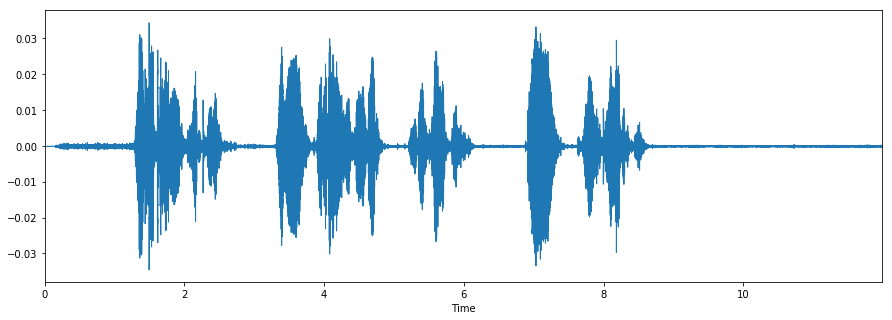

In [72]:

import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [73]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [74]:
livedf2= pd.DataFrame(data=livedf2)

In [75]:

livedf2 = livedf2.stack().to_frame().T

In [76]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-40.103837,-39.273401,-41.255057,-42.050831,-40.680058,-40.16206,-40.441648,-42.123072,-41.404497,-41.87492,...,-41.436338,-38.823727,-39.470488,-42.350734,-41.205008,-40.192111,-42.082844,-42.074406,-41.762324,-39.656362


In [77]:
twodim= np.expand_dims(livedf2, axis=2)

In [78]:

livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 190ms/step


In [79]:
livepreds

array([[0.05351334, 0.10772617, 0.11396584, 0.10253913, 0.13028018,
        0.06534802, 0.09249701, 0.10193711, 0.1082004 , 0.12399279]],
      dtype=float32)

In [80]:

livepreds1=livepreds.argmax(axis=1)

In [81]:

liveabc = livepreds1.astype(int).flatten()

In [82]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female_sad'], dtype=object)